In [1]:
from explore_enron_data import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 数据初探

In [2]:
enron_df = pd.DataFrame(enron_data).T

In [3]:
enron_df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [4]:
enron_df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [5]:
enron_df.describe()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,42,40,45,18,112,102,95,65,58,42,...,53,93,2,98,19,95,84,87,126,125
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,107,97,129,35,44,51,60,60,60,...,80,53,128,36,128,51,60,60,21,20


        从上面的表格可以看出，首先数据的类型有数字类型和非数字类型，并且其中包含大量的NaN空值，要想办法处理,并且数字类型都是object，需要转换。
        其中，email_address看起来比较杂乱，对运用机器学习没有太大的帮助，其实际信息都是可以由员工姓名替代的，选择去除。
        另外，poi特征是Boolean值，并且poi值数据的标签项目，如果打算运用在算法内，需要考虑转化为0-1值，最终的目的就是要检测算法在判断poi值的准确性。
        最后，表格的信息实际上由两部分组成，一部分为收入等的财务状况，另一部分为邮件收发状况。
        所以，我考虑的思路是，将表格分裂为两个不同的部分分别观察和分析，再处理异常值，最后选择特征。

## 数据清理

In [6]:
#先删除无用特征email_address
enron_new = enron_df.drop(['email_address'], axis = 1)

In [7]:
#列出财务状况数据和邮件收发状况
finance_feature = ['bonus', 'deferral_payments', 'deferred_income','director_fees','exercised_stock_options', 'expenses','loan_advances',
                   'long_term_incentive','other','restricted_stock','restricted_stock_deferred','salary','total_payments',
                   'total_stock_value']

email_feature = ['from_messages','to_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi','poi']

#创建两个新的dataframe，一个是财务状况，一个是邮件状况
finance_df = enron_new.drop(email_feature,axis = 1)
email_df = enron_new.drop(finance_feature,axis = 1)

In [8]:
#由于数据都是object形式，需要将所有数据转化为数字
def numeric(features,data):
    for feature in features:
        data[feature] = pd.to_numeric(data[feature], errors = 'corece')

numeric(finance_feature, finance_df)
numeric(email_feature, email_df)

In [9]:
#查看两个表格的数据状况
finance_df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,1729541.0,13868.0,NaN,304805.0,152.0,126027.0,-126027.0,201955.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,4046157.0,56301.0,NaN,NaN,864523.0,1757552.0,-560222.0,477.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,6680544.0,11200.0,NaN,1586055.0,2660303.0,3942714.0,NaN,267102.0,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,129142.0,NaN,NaN,69.0,145796.0,-82782.0,239671.0,827696.0,63014.0


In [10]:
email_df.head()

,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,2195.0,47.0,65.0,False,1407.0,2902.0
BADUM JAMES P,NaN,NaN,NaN,False,NaN,NaN
BANNANTINE JAMES M,29.0,39.0,0.0,False,465.0,566.0
BAXTER JOHN C,NaN,NaN,NaN,False,NaN,NaN
BAY FRANKLIN R,NaN,NaN,NaN,False,NaN,NaN


In [11]:
finance_df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
loan_advances                142
long_term_incentive           80
other                         53
restricted_stock              36
restricted_stock_deferred    128
salary                        51
total_payments                21
total_stock_value             20
dtype: int64

In [12]:
email_df.isnull().sum()

from_messages              60
from_poi_to_this_person    60
from_this_person_to_poi    60
poi                         0
shared_receipt_with_poi    60
to_messages                60
dtype: int64

In [13]:
#考虑去除缺失值过多的特征
finance_df = finance_df.drop(['deferral_payments', 'deferred_income', 'director_fees', 'loan_advances','restricted_stock_deferred'], axis = 1)

In [14]:
#填充缺失值，由于财务数据一般适合用中位数估计，所以对财务指标进行中位数填充，而邮件指标用0填充
finance_df = finance_df.fillna(finance_df.median())
email_df = email_df.fillna(0)

In [15]:
#最后整合回一个数据表进行分析
enron = pd.concat([finance_df,email_df], axis = 1)

        可以看到，首先经过处理的数据，排除了一些缺失过多的特征，并且其他的缺失也进行了填充，数据变得更加合理友善了，但是还需要进行进一步处理，接下来通过数据可视化进一步筛选数据。

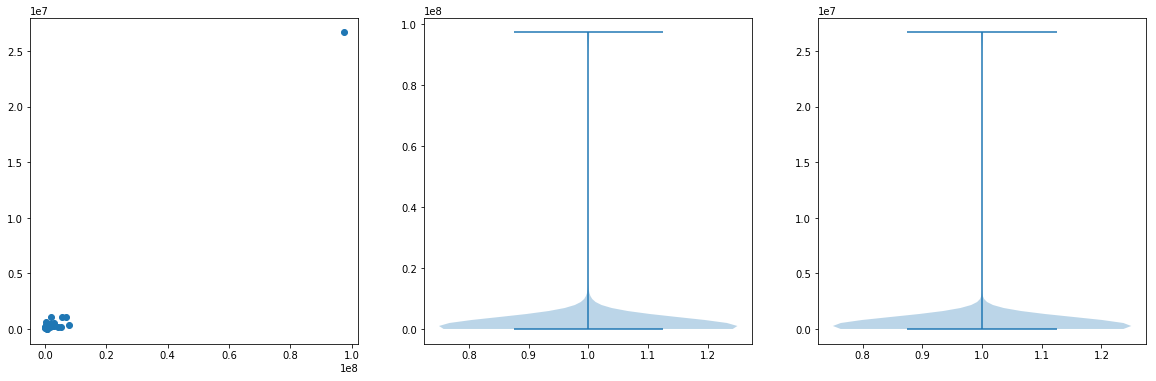

In [16]:
plt.figure(figsize = [20,6])

plt.subplot(1,3,1)
plt.scatter(enron['bonus'],enron['salary'])

plt.subplot(1,3,2)
plt.violinplot(enron['bonus'])

plt.subplot(1,3,3)
plt.violinplot(enron['salary'])

plt.show()

        通过作图，发现都有一个共同的异常值，远远超过正常水平，并且三个同时出现，应该不是偶然现象，返回去检查表格中的这个异常值。

In [17]:
#查找异常值标签
outlier = [i for i in enron.index if enron['bonus'].loc[i] > 80000000]

In [18]:
enron.loc[outlier]

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,shared_receipt_with_poi,to_messages
TOTAL,97343619.0,311764000.0,5235198.0,48521928.0,42667589.0,130322299.0,26704229.0,309886585.0,434509511.0,0.0,0.0,0.0,False,0.0,0.0


In [19]:
#这里的异常值是将统计求和的数字也加入了标签当中，应当去除
enron = enron.drop(['TOTAL'], axis = 0)

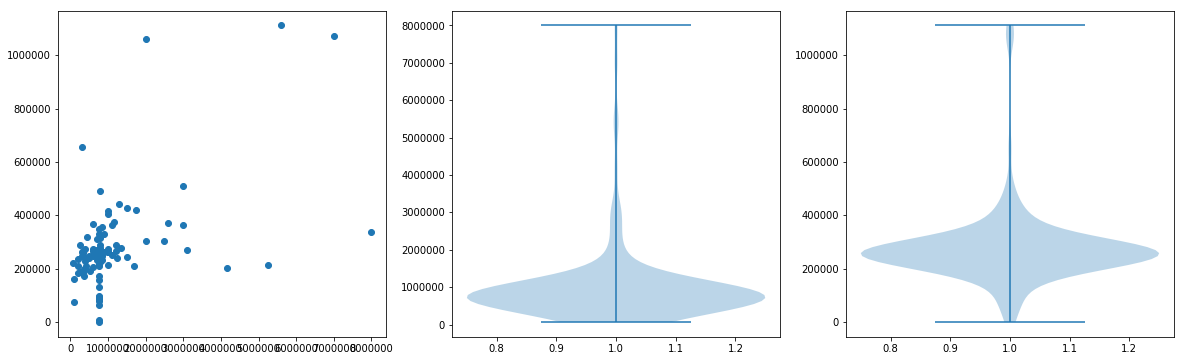

In [20]:
#再画图看看是否存在
plt.figure(figsize = [20,6])

plt.subplot(1,3,1)
plt.scatter(enron['bonus'],enron['salary'])

plt.subplot(1,3,2)
plt.violinplot(enron['bonus'])

plt.subplot(1,3,3)
plt.violinplot(enron['salary'])
plt.show()

In [21]:
#重新检查下每个人名字，看看是否还存在类似TOTAL但是数据没有成为异常值
[name for name in enron.index]

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

In [22]:
# 发现 'THE TRAVEL AGENCY IN THE PARK', 公园内的旅行社？看看具体数字
enron.loc['THE TRAVEL AGENCY IN THE PARK']

bonus                           769375
exercised_stock_options    1.31081e+06
expenses                         46950
long_term_incentive             442035
other                           362096
restricted_stock                451740
salary                          259996
total_payments                  362096
total_stock_value          1.10287e+06
from_messages                        0
from_poi_to_this_person              0
from_this_person_to_poi              0
poi                              False
shared_receipt_with_poi              0
to_messages                          0
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

        'THE TRAVEL AGENCY IN THE PARK' 数据中有奇怪的点，但是没有具体的邮件往来，可以判断并不是具体的员工，也许是一个账目转移中心，我们的目标是找出嫌疑人，故删除。

In [23]:
enron.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace = True)

## 特征工程

In [24]:
#再看看清理后的数据集
enron.head(10)

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,shared_receipt_with_poi,to_messages
ALLEN PHILLIP K,4175000.0,1729541.0,13868.0,304805.0,152.0,126027.0,201955.0,4484442.0,1729541.0,2195.0,47.0,65.0,False,1407.0,2902.0
BADUM JAMES P,769375.0,257817.0,3486.0,442035.0,52382.0,451740.0,259996.0,182466.0,257817.0,0.0,0.0,0.0,False,0.0,0.0
BANNANTINE JAMES M,769375.0,4046157.0,56301.0,442035.0,864523.0,1757552.0,477.0,916197.0,5243487.0,29.0,39.0,0.0,False,465.0,566.0
BAXTER JOHN C,1200000.0,6680544.0,11200.0,1586055.0,2660303.0,3942714.0,267102.0,5634343.0,10623258.0,0.0,0.0,0.0,False,0.0,0.0
BAY FRANKLIN R,400000.0,1310813.5,129142.0,442035.0,69.0,145796.0,239671.0,827696.0,63014.0,0.0,0.0,0.0,False,0.0,0.0
BAZELIDES PHILIP J,769375.0,1599641.0,46950.0,93750.0,874.0,451740.0,80818.0,860136.0,1599641.0,0.0,0.0,0.0,False,0.0,0.0
BECK SALLY W,700000.0,1310813.5,37172.0,442035.0,566.0,126027.0,231330.0,969068.0,126027.0,4343.0,144.0,386.0,False,2639.0,7315.0
BELDEN TIMOTHY N,5249999.0,953136.0,17355.0,442035.0,210698.0,157569.0,213999.0,5501630.0,1110705.0,484.0,228.0,108.0,True,5521.0,7991.0
BELFER ROBERT,769375.0,3285.0,46950.0,442035.0,52382.0,451740.0,259996.0,102500.0,-44093.0,0.0,0.0,0.0,False,0.0,0.0
BERBERIAN DAVID,769375.0,1624396.0,11892.0,442035.0,52382.0,869220.0,216582.0,228474.0,2493616.0,0.0,0.0,0.0,False,0.0,0.0


        要了解如何进行特征工程，首先要弄明白每个特征的意义，先对每个特征的解释进行调查。
        bonus：奖金
        expenses：费用
        other：其他收入
        salary：工资
        total_payment：总收入
        
        restricted_stock：限制股权（还未套现）
        exercised_stock_options：已行权股票期权
        total_stock_value：总股权价值
        
        from_messages：邮件收件数
        from_poi_to_this_person：来自嫌疑人的邮件收件数
        to_messages：邮件发件数
        from_this_person_to_poi：发向嫌疑人的邮件发件数
        shared_receipt_with_poi：和嫌疑人共有邮件数
        
        poi：嫌疑人标签        

        首先，通过对事件的了解，poi嫌疑人更加清楚公司的财务状况，他们会选择提前套现，所以套现股票的比例会比较高，加入行权和限售股权比作为一个新的特征。
        另外，邮件收发的绝对数量并不能完全看出是否和判断嫌疑人有关联，例如如果有一个员工是处于邮件收发部门可能会拥有绝对数字较高，但是和嫌疑人的交流不一定会高比例，嫌疑人之间的交流应该是通过相互发送邮件进行小圈子内沟通，所以添加两个新的特征，分别是来自嫌疑人的邮件比例和发往嫌疑人的邮件比例。

In [25]:
enron['from_poi_ratio'] = (enron['from_poi_to_this_person']/enron['from_messages']).fillna(0)
enron['to_poi_ratio'] = (enron['from_this_person_to_poi']/enron['to_messages']).fillna(0)
enron['share_poi_ratio'] = (enron['shared_receipt_with_poi']/enron['from_messages']).fillna(0)
enron['exercised_total_ratio'] = (enron['exercised_stock_options']/enron['total_stock_value']).fillna(0)


In [26]:
enron.isnull().sum()

bonus                      0
exercised_stock_options    0
expenses                   0
long_term_incentive        0
other                      0
restricted_stock           0
salary                     0
total_payments             0
total_stock_value          0
from_messages              0
from_poi_to_this_person    0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
to_messages                0
from_poi_ratio             0
to_poi_ratio               0
share_poi_ratio            0
exercised_total_ratio      0
dtype: int64

In [27]:
enron.head()

,bonus,exercised_stock_options,expenses,long_term_incentive,other,restricted_stock,salary,total_payments,total_stock_value,from_messages,from_poi_to_this_person,from_this_person_to_poi,poi,shared_receipt_with_poi,to_messages,from_poi_ratio,to_poi_ratio,share_poi_ratio,exercised_total_ratio
ALLEN PHILLIP K,4175000.0,1729541.0,13868.0,304805.0,152.0,126027.0,201955.0,4484442.0,1729541.0,2195.0,47.0,65.0,False,1407.0,2902.0,0.021412,0.022398,0.641002,1.000000
BADUM JAMES P,769375.0,257817.0,3486.0,442035.0,52382.0,451740.0,259996.0,182466.0,257817.0,0.0,0.0,0.0,False,0.0,0.0,0.000000,0.000000,0.000000,1.000000
BANNANTINE JAMES M,769375.0,4046157.0,56301.0,442035.0,864523.0,1757552.0,477.0,916197.0,5243487.0,29.0,39.0,0.0,False,465.0,566.0,1.344828,0.000000,16.034483,0.771654
BAXTER JOHN C,1200000.0,6680544.0,11200.0,1586055.0,2660303.0,3942714.0,267102.0,5634343.0,10623258.0,0.0,0.0,0.0,False,0.0,0.0,0.000000,0.000000,0.000000,0.628860
BAY FRANKLIN R,400000.0,1310813.5,129142.0,442035.0,69.0,145796.0,239671.0,827696.0,63014.0,0.0,0.0,0.0,False,0.0,0.0,0.000000,0.000000,0.000000,20.801941


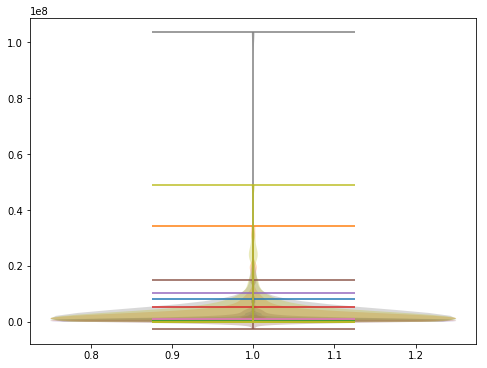

In [28]:
#检查分布状况
plt.figure(figsize=[8,6])
for i in enron.columns:
    plt.violinplot(enron[i])
plt.show()

        可以看到，经过清理和创建新的数据之后，通过画图，可以看到几乎所有的数据都是严重右偏的，考虑对数据进行对数转换。
        同时，由于数据中含有数值，又有比例，所以经过对数转换后进行数据的无量纲化处理，考虑使用区间缩放处理。

In [29]:
#由于只需要对数据特征作为处理，先区分特征和标签
enron_features = enron.drop(['poi'],axis = 1)
enron_labels = enron['poi']

In [30]:
#先进行对数转换
from numpy import log10

for i in enron_features.index:
    for j in enron_features.columns:
        if enron_features[j].loc[i] != 0:
            enron_features[j].loc[i] = log10(abs(enron_features[j].loc[i]))
        else:
            enron_features[j].loc[i]

In [31]:
#特征缩放
for i in enron_features.index:
    for j in enron_features.columns:
        enron_features[j].loc[i] = (enron_features[j].loc[i] - enron_features[j].min())/(enron_features[j].max() - enron_features[j].min())

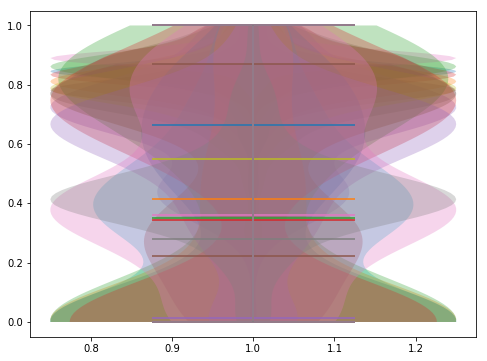

In [32]:
plt.figure(figsize=[8,6])
for i in enron_features.columns:
    plt.violinplot(enron_features[i])
plt.show()

## 算法与调试

In [33]:
from sklearn.cross_validation import train_test_split

d:\Users\dengj\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
feature_train, feature_test, label_train, label_test = train_test_split(enron_features, enron_labels, test_size = 0.3, random_state = 42)

In [35]:
#开始值行算法
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [36]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth= 5, min_samples_split= 8)
clf.fit(feature_train, label_train)
pred = clf.predict(feature_test)

print 'acc:',accuracy_score(label_test, pred)
print 'precision:',precision_score(label_test, pred)
print 'recall:',recall_score(label_test, pred)
print 'f1:',f1_score(label_test, pred)
zip(enron_features.columns,clf.feature_importances_)

acc: 0.818181818182
precision: 0.285714285714
recall: 0.4
f1: 0.333333333333


[('bonus', 0.0),
 ('exercised_stock_options', 0.0),
 ('expenses', 0.10694874773351788),
 ('long_term_incentive', 0.24417342772983308),
 ('other', 0.0),
 ('restricted_stock', 0.050733841769540461),
 ('salary', 0.0),
 ('total_payments', 0.0),
 ('total_stock_value', 0.0),
 ('from_messages', 0.0),
 ('from_poi_to_this_person', 0.0),
 ('from_this_person_to_poi', 0.0),
 ('shared_receipt_with_poi', 0.28162287274695441),
 ('to_messages', 0.090434602862901142),
 ('from_poi_ratio', 0.22608650715725293),
 ('to_poi_ratio', 0.0),
 ('share_poi_ratio', 0.0),
 ('exercised_total_ratio', 0.0)]

In [37]:
#朴素贝叶斯状况
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(feature_train, label_train)
pred = clf.predict(feature_test)
print 'acc:',accuracy_score(label_test, pred)
print 'precision:',precision_score(label_test, pred)
print 'recall:',recall_score(label_test, pred)
print 'f1:',f1_score(label_test, pred)


acc: 0.75
precision: 0.25
recall: 0.6
f1: 0.352941176471


In [38]:
#再使用一个集成算法
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(feature_train, label_train)
pred = clf.predict(feature_test)
print 'acc:',accuracy_score(label_test, pred)
print 'precision:',precision_score(label_test, pred)
print 'recall:',recall_score(label_test, pred)
print 'f1:',f1_score(label_test, pred)

acc: 0.863636363636
precision: 0.333333333333
recall: 0.2
f1: 0.25


        根据上面的结论，看起来还是决策树的潜力更大，考虑使用决策树进行深度的调整。

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

kf = KFold(n_splits= 3, shuffle=True,random_state=430)

count = 1
for x_index, y_index in kf.split(enron_features):
    feature_train, feature_test = enron_features.iloc[x_index], enron_features.iloc[y_index]
    label_train, label_test = enron_labels.iloc[x_index], enron_labels.iloc[y_index]
    
    clf = DecisionTreeClassifier()
    clf.fit(feature_train, label_train)

    pred = clf.predict(feature_test)
    print count,'fold: acc',accuracy_score(label_test, pred),'precision:',precision_score(label_test, pred),'recall:',recall_score(label_test, pred),'f1:',f1_score(label_test, pred)
    
    count += 1

1 fold: acc 0.770833333333 precision: 0.0 recall: 0.0 f1: 0.0
2 fold: acc 0.833333333333 precision: 0.333333333333 recall: 0.333333333333 f1: 0.333333333333
3 fold: acc 0.75 precision: 0.357142857143 recall: 0.625 f1: 0.454545454545


In [40]:
from sklearn.model_selection import GridSearchCV
para = {'criterion':('gini','entropy'),
        'max_depth':[1,2,3,4,5,6,7,8,9,10],
        'min_samples_split':[2,3,4,5,6,7,8,9,10]}

decision_tree = DecisionTreeClassifier()

clf = GridSearchCV(decision_tree, para, cv = kf)

clf.fit(feature_train, label_train)
pred = clf.predict(feature_test)

print clf.best_params_
print 'acc:',accuracy_score(label_test, pred)
print 'precision:',precision_score(label_test, pred)
print 'recall:',recall_score(label_test, pred)
print 'f1:',f1_score(label_test, pred)

{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 1}
acc: 0.854166666667
precision: 0.6
recall: 0.375
f1: 0.461538461538


        已经可以符合要求。